# IMPORTACION DE DATOS


In [ ]:
import pandas as pd
import numpy as np

# Cargar el archivo CSV, el nombre debe ser datos_limon_final.csv
df = pd.read_csv('datos_limon_final.csv')

# Mostrar las primeras filas
print(df.head())

       Fechas  Trimestre   Año    Mes  Día Estación Precios Bolsa  \
0  2022-01-01          1  2022  enero    1   verano          1.19   
1  2022-01-02          1  2022  enero    2   verano          1.19   
2  2022-01-03          1  2022  enero    3   verano          1.25   
3  2022-01-04          1  2022  enero    4   verano          1.22   
4  2022-01-05          1  2022  enero    5   verano          1.22   

  Precios Caja Temp Max Temp Min Humedad Precipitaciones  \
0         1.47     31.7     21.2     NaN               0   
1         1.47     31.9     21.5     NaN             NaN   
2         1.58     32.9     21.1     NaN             NaN   
3          1.5     32.9       20     NaN             NaN   
4          1.5     32.2     20.6     NaN             NaN   

   Masa ingreso Bolsa(T)  Masa ingreso Caja(T)  Incendio Forestal  \
0                    NaN                   NaN                  0   
1                    NaN                   NaN                  0   
2                

# ESTANDARIZACIÓN DE DATOS

In [ ]:
#revisamos las columnas para poder asegurar de convertirlas a números
df.dtypes

,0
Fechas,object
Trimestre,int64
Año,int64
Mes,object
Día,int64
Estación,object
Precios Bolsa,object
Precios Caja,object
Temp Max,object
Temp Min,object


In [ ]:
#Eliminacion la columna Fechas dado que la informacion ya fue separada
df = df.drop(columns=['Fechas'])
#corregimos todos los puntos y los pasamos a , para despues convetir a números
df['Precios Bolsa'] = df['Precios Bolsa'].str.replace(',', '.')
df['Precios Caja'] = df['Precios Caja'].str.replace(',', '.')
df['Temp Max'] = df['Temp Max'].str.replace(',', '.')
df['Temp Min'] = df['Temp Min'].str.replace(',', '.')
df['Humedad'] = df['Humedad'].str.replace(',', '.')
df['Precipitaciones'] = df['Precipitaciones'].str.replace(',','.')


In [ ]:
df['Precios Bolsa'] = pd.to_numeric(df['Precios Bolsa'])
df['Precios Caja'] = pd.to_numeric(df['Precios Caja'])
df['Temp Max'] = pd.to_numeric(df['Temp Max'])
df['Temp Min'] = pd.to_numeric(df['Temp Min'])
df['Humedad'] = pd.to_numeric(df['Humedad'])
df['Precipitaciones'] = pd.to_numeric(df['Precipitaciones'])
df.dtypes

,0
Trimestre,int64
Año,int64
Mes,object
Día,int64
Estación,object
Precios Bolsa,float64
Precios Caja,float64
Temp Max,float64
Temp Min,float64
Humedad,float64


In [ ]:
df.describe()

,Trimestre,Año,Día,Precios Bolsa,Precios Caja,Temp Max,Temp Min,Humedad,Precipitaciones,Masa ingreso Bolsa(T),Masa ingreso Caja(T),Incendio Forestal,Lluvias Intensas,Inundacion,Huaico,Fenomeno_Niño
count,1096.000000,1096.000000,1096.000000,1094.000000,1094.000000,1091.000000,1088.000000,911.000000,953.000000,595.000000,438.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000
mean,2.508212,2023.000912,15.732664,2.296298,2.513464,31.392759,20.379283,71.526345,0.761280,357.398319,77.488584,0.028285,0.221715,0.163321,0.071168,0.275547
std,1.117697,0.817055,8.805388,1.811040,1.846866,2.563959,2.791129,5.337723,5.978503,320.154962,82.904531,0.165861,0.415590,0.369827,0.257222,0.446994
min,1.000000,2022.000000,1.000000,0.940000,1.090000,24.200000,14.200000,57.600000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2022.000000,8.000000,1.322500,1.520000,29.400000,17.800000,68.050000,0.000000,74.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,2023.000000,16.000000,1.720000,1.900000,31.400000,20.600000,71.700000,0.000000,258.000000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,2024.000000,23.000000,2.330000,2.595000,33.100000,22.600000,74.700000,0.000000,607.000000,99.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,4.000000,2024.000000,31.000000,12.110000,12.500000,38.400000,26.600000,91.600000,94.500000,1354.000000,503.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# CORRECCION DE VALORES VACIOS

In [ ]:
# Porcentaje de nulos
null_pct = (df.isna().sum() / len(df)).sort_values(ascending=False) * 100
print("\\nPorcentaje de nulos por columna (%):")
print(null_pct)

\nPorcentaje de nulos por columna (%):
Masa ingreso Caja(T)     60.036496
Masa ingreso Bolsa(T)    45.711679
Humedad                  16.879562
Precipitaciones          13.047445
Temp Min                  0.729927
Temp Max                  0.456204
Precios Caja              0.182482
Precios Bolsa             0.182482
Año                       0.000000
Trimestre                 0.000000
Día                       0.000000
Mes                       0.000000
Estación                  0.000000
Incendio Forestal         0.000000
Lluvias Intensas          0.000000
Inundacion                0.000000
Huaico                    0.000000
Fenomeno_Niño             0.000000
dtype: float64


In [ ]:
#Para conversar mejor los datos posibles se va a completar para todos
#los datos de las columnas: Precios Caja, Precios Bolsa, Temp Min, Temp Max,
#Precipitaciones, Humedad y Masa ingreso Bolsa(T) se completan con los valores interpolados de manera lineal

df['Precios Bolsa'] = df['Precios Bolsa'].interpolate(method='linear')
df['Precios Caja'] = df['Precios Caja'].interpolate(method='linear')
df['Temp Min'] = df['Temp Min'].interpolate(method='linear')
df['Temp Max'] = df['Temp Max'].interpolate(method='linear')
df['Precipitaciones'] = df['Precipitaciones'].interpolate(method='linear')
df['Humedad'] = df['Humedad'].interpolate(method='linear')
df['Masa ingreso Bolsa(T)'] = df['Masa ingreso Bolsa(T)'].interpolate(method='linear')

In [ ]:
#se hace el drop de la columna de 'Masa ingreso Caja(T)' dado que es la columna
#que tiene una proporcion de nulos demasiado elevada y tiene información similar
# de la 'Masa ingreso Bolsa(T)'
df.drop(columns=['Masa ingreso Caja(T)'], inplace=True)

In [ ]:
#Revision de valores nulos posterior a inserción de datos de nulos
null_pct = (df.isna().sum() / len(df)).sort_values(ascending=False) * 100
print("\\nPorcentaje de nulos por columna (%):")
print(null_pct)
#Dado que que se tiene una serie temporal se mantiene el resto de nulos restantes
#Para que la información tenga mayor consistencia posible y no insertar datos
#arbitrarios

\nPorcentaje de nulos por columna (%):
Masa ingreso Bolsa(T)    33.394161
Humedad                  14.324818
Trimestre                 0.000000
Año                       0.000000
Mes                       0.000000
Precios Bolsa             0.000000
Precios Caja              0.000000
Día                       0.000000
Estación                  0.000000
Temp Min                  0.000000
Temp Max                  0.000000
Precipitaciones           0.000000
Incendio Forestal         0.000000
Lluvias Intensas          0.000000
Inundacion                0.000000
Huaico                    0.000000
Fenomeno_Niño             0.000000
dtype: float64


# CODIFICACION DE CATEGORIAS DE TIEMPOS
La mejor combinación de codificación para poder reducir la correlacion entre variables y aprovechar los datos de la mejor posible es:
  - Meses: codificación ciclica
  - Estacion: one hot encoding
  - Trimestre: one hot encoding

In [ ]:
#Codificacion inicial del mes
meses = {
    'enero': 1, 'febrero': 2, 'marzo': 3, 'abril': 4, 'mayo': 5, 'junio': 6,
    'julio': 7, 'agosto': 8, 'septiembre': 9, 'octubre': 10, 'noviembre': 11, 'diciembre': 12
}

# Mapear la columna 'Mes' a números usando el diccionario
df['Mes_numerico'] = df['Mes'].map(meses)


In [ ]:
df.head()

,Trimestre,Año,Mes,Día,Estación,Precios Bolsa,Precios Caja,Temp Max,Temp Min,Humedad,Precipitaciones,Masa ingreso Bolsa(T),Incendio Forestal,Lluvias Intensas,Inundacion,Huaico,Fenomeno_Niño,Mes_numerico
0,1,2022,enero,1,verano,1.19,1.47,31.7,21.2,NaN,0.000000,NaN,0,0,0,0,0,1
1,1,2022,enero,2,verano,1.19,1.47,31.9,21.5,NaN,0.002655,NaN,0,0,0,0,0,1
2,1,2022,enero,3,verano,1.25,1.58,32.9,21.1,NaN,0.005310,NaN,0,0,0,0,0,1
3,1,2022,enero,4,verano,1.22,1.50,32.9,20.0,NaN,0.007965,NaN,0,0,0,0,0,1
4,1,2022,enero,5,verano,1.22,1.50,32.2,20.6,NaN,0.010619,NaN,0,0,0,0,0,1


In [ ]:
#Eliminacion de columna original para dejar columna codificada
df.drop(columns=['Mes'], inplace=True)

In [ ]:
df.head()

,Trimestre,Año,Día,Estación,Precios Bolsa,Precios Caja,Temp Max,Temp Min,Humedad,Precipitaciones,Masa ingreso Bolsa(T),Incendio Forestal,Lluvias Intensas,Inundacion,Huaico,Fenomeno_Niño,Mes_numerico
0,1,2022,1,verano,1.19,1.47,31.7,21.2,NaN,0.000000,NaN,0,0,0,0,0,1
1,1,2022,2,verano,1.19,1.47,31.9,21.5,NaN,0.002655,NaN,0,0,0,0,0,1
2,1,2022,3,verano,1.25,1.58,32.9,21.1,NaN,0.005310,NaN,0,0,0,0,0,1
3,1,2022,4,verano,1.22,1.50,32.9,20.0,NaN,0.007965,NaN,0,0,0,0,0,1
4,1,2022,5,verano,1.22,1.50,32.2,20.6,NaN,0.010619,NaN,0,0,0,0,0,1


In [ ]:
#Datos unicos de estacion
df['Estación'].unique()

array(['verano', 'otoño', 'invierno', 'primavera'], dtype=object)

In [ ]:
#One hot encoding
df = pd.get_dummies(df, columns=['Estación','Trimestre'])

In [ ]:
df.dtypes

,0
Año,int64
Día,int64
Precios Bolsa,float64
Precios Caja,float64
Temp Max,float64
Temp Min,float64
Humedad,float64
Precipitaciones,float64
Masa ingreso Bolsa(T),float64
Incendio Forestal,int64


In [ ]:
#Codificacion ciclica empleando seno y coseno del mes dado su periodicidad
df['mes_sin'] = np.sin(2 * np.pi * df['Mes_numerico'] / 12)
df['mes_cos'] = np.cos(2 * np.pi * df['Mes_numerico'] / 12)
df.drop(columns=['Mes_numerico'],inplace=True)

print(df)

       Año  Día  Precios Bolsa  Precios Caja  Temp Max  Temp Min  Humedad  \
0     2022    1           1.19          1.47      31.7      21.2      NaN   
1     2022    2           1.19          1.47      31.9      21.5      NaN   
2     2022    3           1.25          1.58      32.9      21.1      NaN   
3     2022    4           1.22          1.50      32.9      20.0      NaN   
4     2022    5           1.22          1.50      32.2      20.6      NaN   
...    ...  ...            ...           ...       ...       ...      ...   
1091  2024   27           1.94          3.15      31.0      22.4     65.9   
1092  2024   28           1.89          2.93      31.8      22.0     68.2   
1093  2024   29           1.89          2.93      32.6      21.4     69.2   
1094  2024   30           1.83          2.83      32.0      21.2     66.4   
1095  2024   31           1.86          2.77      27.4      22.6     78.2   

      Precipitaciones  Masa ingreso Bolsa(T)  Incendio Forestal  ...  \
0  

# INGENIERIA DE ATRIBUTOS

In [ ]:
#Para nuestro caso al estar manejando muchos factores interconectados es importante
#considerar atributos más avanzados como interacciones (temperaturaxprecitacion)
#y columnas de lag para el caso de temperatura, humedad y precipitaciones
df['Temp_MinxPrecipitacion'] = df['Temp Min']* df['Precipitaciones']
df['Temp_MaxxPrecipitacion'] = df['Temp Max']* df['Precipitaciones']

In [ ]:
#columnas lag de temperatura, humedad y precipitaciones
df['Temp_Min_lag10'] = df['Temp Min'].shift(10)
df['Temp_Max_lag10'] = df['Temp Max'].shift(10)
df['Humedad_lag10'] = df['Humedad'].shift(10)
df['Precipitaciones_lag10'] = df['Precipitaciones'].shift(10)

In [ ]:
#Generamos lags en los precios, de esta manera el modelo puede ver como se comporta los precios en el transcurso del tiempo
df["Precio_lag1"]  = df["Precios Caja"].shift(1)
df["Precio_lag3"]  = df["Precios Caja"].shift(3)
df["Precio_lag7"]  = df["Precios Caja"].shift(7)
df["Precio_lag14"] = df["Precios Caja"].shift(14)
df["Precio_lag21"] = df["Precios Caja"].shift(21)
df["Precio_lag30"] = df["Precios Caja"].shift(30)

In [ ]:
#generamos valores de promedios y desviaciones de periodos de 1 semana, 2 semanas y 1 mes
#para incrementar la información disponible en el transcurso del tiempo
df["Precio_roll7"]  = df["Precios Caja"].rolling(7).mean()
df["Precio_roll14"] = df["Precios Caja"].rolling(14).mean()
df["Precio_roll30"] = df["Precios Caja"].rolling(30).mean()

df["Precio_vol7"]   = df["Precios Caja"].rolling(7).std()
df["Precio_vol30"]  = df["Precios Caja"].rolling(30).std()

In [ ]:
df.head(15)

,Año,Día,Precios Bolsa,Precios Caja,Temp Max,Temp Min,Humedad,Precipitaciones,Masa ingreso Bolsa(T),Incendio Forestal,...,Precio_lag3,Precio_lag7,Precio_lag14,Precio_lag21,Precio_lag30,Precio_roll7,Precio_roll14,Precio_roll30,Precio_vol7,Precio_vol30
0,2022,1,1.19,1.47,31.7,21.2,NaN,0.000000,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022,2,1.19,1.47,31.9,21.5,NaN,0.002655,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022,3,1.25,1.58,32.9,21.1,NaN,0.005310,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022,4,1.22,1.50,32.9,20.0,NaN,0.007965,NaN,0,...,1.47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022,5,1.22,1.50,32.2,20.6,NaN,0.010619,NaN,0,...,1.47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2022,6,1.25,1.55,31.3,19.2,NaN,0.013274,NaN,0,...,1.58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2022,7,1.25,1.50,31.3,20.0,NaN,0.015929,NaN,0,...,1.50,NaN,NaN,NaN,NaN,1.510000,NaN,NaN,0.040825,NaN
7,2022,8,1.25,1.52,33.5,21.4,NaN,0.018584,NaN,0,...,1.50,1.47,NaN,NaN,NaN,1.517143,NaN,NaN,0.036839,NaN
8,2022,9,1.25,1.52,32.0,21.7,NaN,0.021239,NaN,0,...,1.55,1.47,NaN,NaN,NaN,1.524286,NaN,NaN,0.030472,NaN
9,2022,10,1.25,1.55,32.8,20.6,NaN,0.023894,NaN,1,...,1.50,1.58,NaN,NaN,NaN,1.520000,NaN,NaN,0.022361,NaN


In [ ]:
#eliminamos los registros con NAN para que no ningun vacío de nivel de desfase
#dentro del dataset
df = df.dropna()

In [ ]:
df.head()

,Año,Día,Precios Bolsa,Precios Caja,Temp Max,Temp Min,Humedad,Precipitaciones,Masa ingreso Bolsa(T),Incendio Forestal,...,Precio_lag3,Precio_lag7,Precio_lag14,Precio_lag21,Precio_lag30,Precio_roll7,Precio_roll14,Precio_roll30,Precio_vol7,Precio_vol30
366,2023,2,2.08,2.34,33.6,22.0,63.7,0.0,511.0,0,...,2.34,2.45,2.01,2.39,2.83,2.392857,2.292143,2.304000,0.075435,0.217170
367,2023,3,2.03,2.23,33.4,20.8,62.1,0.0,56.0,0,...,2.34,2.50,2.07,2.34,2.83,2.354286,2.303571,2.284000,0.080386,0.193384
368,2023,4,2.03,2.23,34.8,21.8,61.5,0.0,89.0,0,...,2.34,2.50,2.07,2.34,2.77,2.315714,2.315000,2.266000,0.061334,0.170347
369,2023,5,2.00,2.17,34.2,19.6,66.1,0.0,366.0,0,...,2.34,2.39,1.96,2.28,2.45,2.284286,2.330000,2.256667,0.072309,0.167565
370,2023,6,2.00,2.17,31.8,19.8,66.2,0.0,362.0,0,...,2.23,2.34,2.01,2.07,2.45,2.260000,2.341429,2.247333,0.078740,0.164189


# Revision de correlaciones de los datos

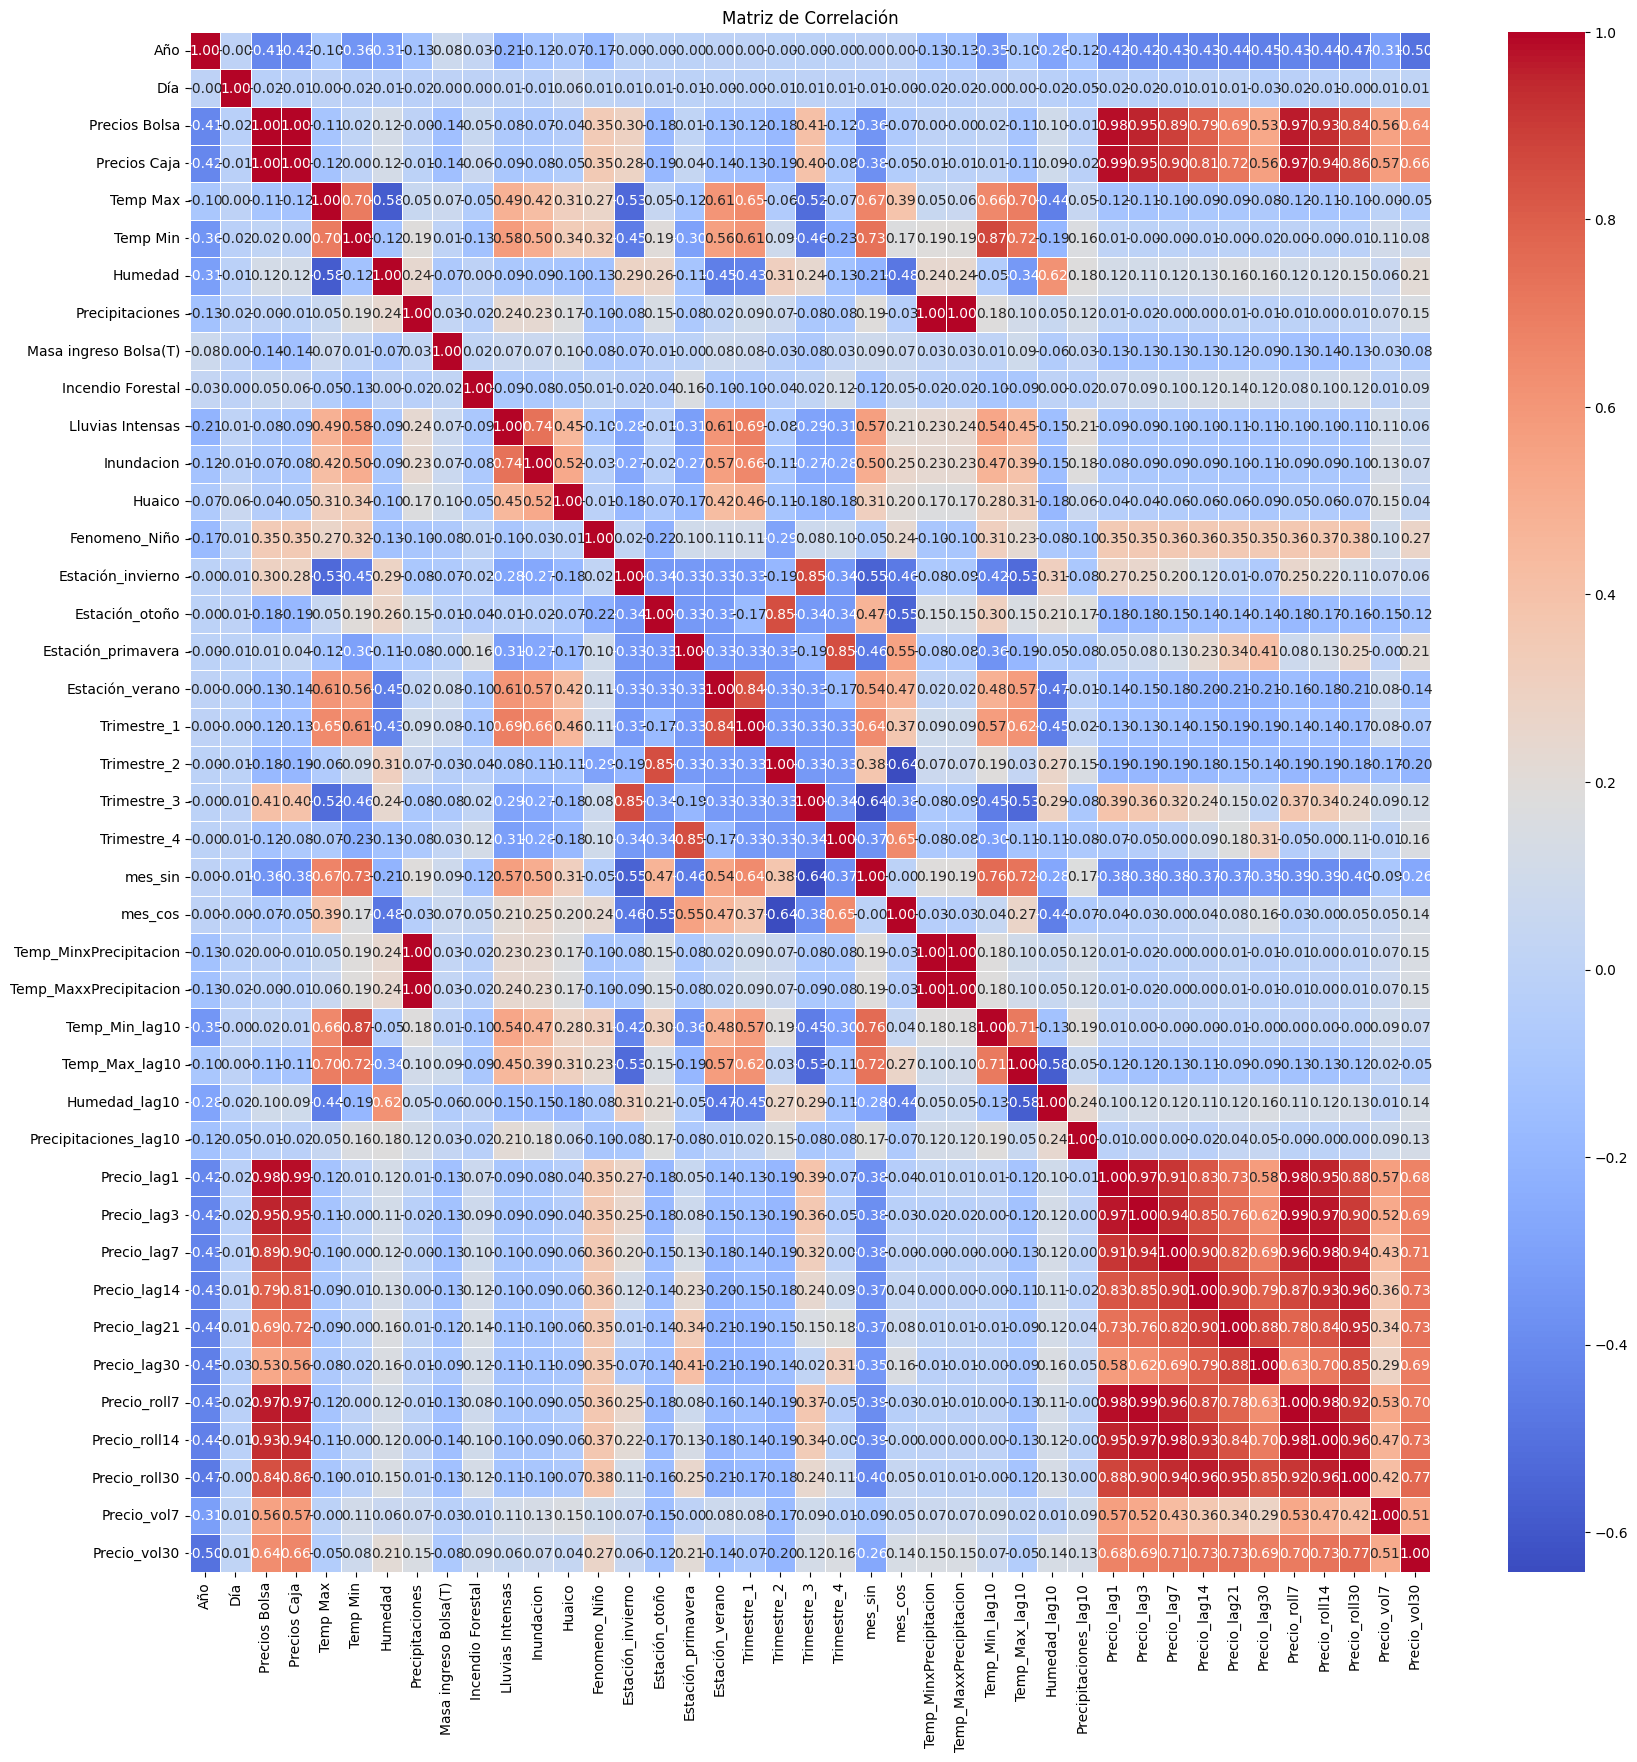

In [ ]:
corr_matriz = df.corr()
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))
sns.heatmap(corr_matriz, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Matriz de Correlación')
plt.show()

In [ ]:
df.columns

Index(['Año', 'Día', 'Precios Bolsa', 'Precios Caja', 'Temp Max', 'Temp Min',
       'Humedad', 'Precipitaciones', 'Masa ingreso Bolsa(T)',
       'Incendio Forestal', 'Lluvias Intensas', 'Inundacion', 'Huaico',
       'Fenomeno_Niño', 'Estación_invierno', 'Estación_otoño',
       'Estación_primavera', 'Estación_verano', 'Trimestre_1', 'Trimestre_2',
       'Trimestre_3', 'Trimestre_4', 'mes_sin', 'mes_cos',
       'Temp_MinxPrecipitacion', 'Temp_MaxxPrecipitacion', 'Temp_Min_lag10',
       'Temp_Max_lag10', 'Humedad_lag10', 'Precipitaciones_lag10',
       'Precio_lag1', 'Precio_lag3', 'Precio_lag7', 'Precio_lag14',
       'Precio_lag21', 'Precio_lag30', 'Precio_roll7', 'Precio_roll14',
       'Precio_roll30', 'Precio_vol7', 'Precio_vol30'],
      dtype='object')

In [ ]:
# dropea Precios Caja y las 2 variables de interaccion de temperatura y precipitacion
# dado que estas tienen una correlacion de 1
#En este caso por más que se tiene una correlación alta se va a dejar los lags de
#precios dado que estos tiene un aporte significativo en el aprendizaje del modelo

df=df[['Año', 'Día', 'Temp Max', 'Temp Min', 'Humedad',
        'Precipitaciones', 'Masa ingreso Bolsa(T)', 'Incendio Forestal',
        'Lluvias Intensas', 'Inundacion', 'Huaico', 'Fenomeno_Niño',
        'Estación_invierno', 'Estación_otoño', 'Estación_primavera',
        'Estación_verano', 'Trimestre_1', 'Trimestre_2', 'Trimestre_3',
        'Trimestre_4', 'mes_sin', 'mes_cos',
        'Temp_Min_lag10', 'Temp_Max_lag10', 'Humedad_lag10',
        'Precipitaciones_lag10','Precio_lag1', 'Precio_lag3', 'Precio_lag7',
        'Precio_lag14', 'Precio_lag21', 'Precio_lag30',
        'Precio_roll7', 'Precio_roll14', 'Precio_roll30',
        'Precio_vol7', 'Precio_vol30','Precios Bolsa']]

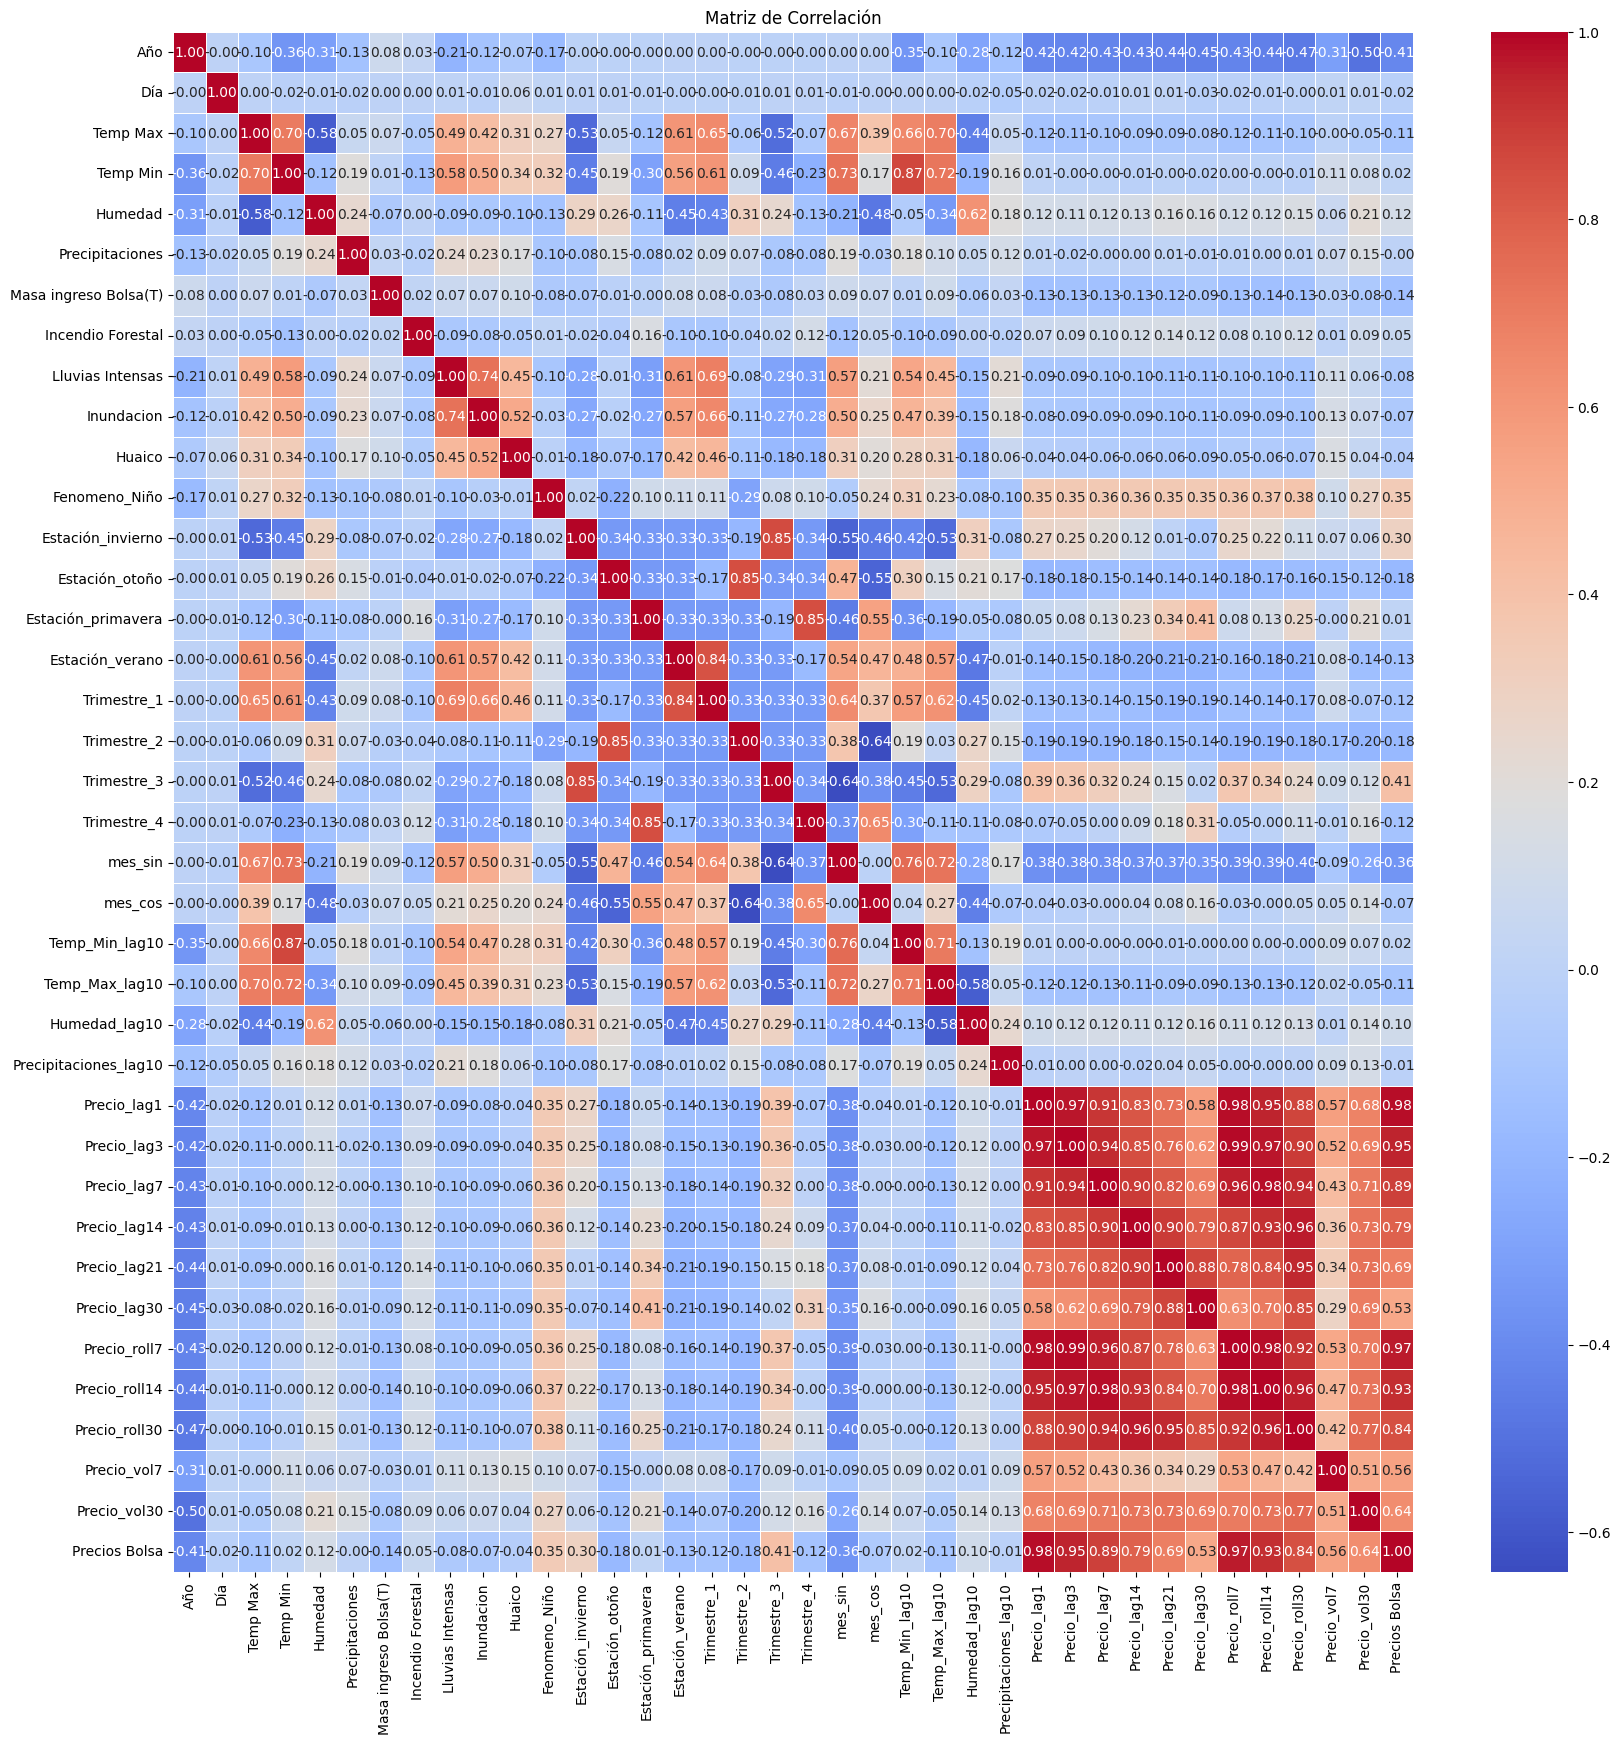

In [ ]:
corr_matriz = df.corr()
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))
sns.heatmap(corr_matriz, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Matriz de Correlación')
plt.show()

In [ ]:
df.columns

Index(['Año', 'Día', 'Temp Max', 'Temp Min', 'Humedad', 'Precipitaciones',
       'Masa ingreso Bolsa(T)', 'Incendio Forestal', 'Lluvias Intensas',
       'Inundacion', 'Huaico', 'Fenomeno_Niño', 'Estación_invierno',
       'Estación_otoño', 'Estación_primavera', 'Estación_verano',
       'Trimestre_1', 'Trimestre_2', 'Trimestre_3', 'Trimestre_4', 'mes_sin',
       'mes_cos', 'Temp_Min_lag10', 'Temp_Max_lag10', 'Humedad_lag10',
       'Precipitaciones_lag10', 'Precio_lag1', 'Precio_lag3', 'Precio_lag7',
       'Precio_lag14', 'Precio_lag21', 'Precio_lag30', 'Precio_roll7',
       'Precio_roll14', 'Precio_roll30', 'Precio_vol7', 'Precio_vol30',
       'Precios Bolsa'],
      dtype='object')

In [ ]:
df.describe()

,Año,Día,Temp Max,Temp Min,Humedad,Precipitaciones,Masa ingreso Bolsa(T),Incendio Forestal,Lluvias Intensas,Inundacion,...,Precio_lag7,Precio_lag14,Precio_lag21,Precio_lag30,Precio_roll7,Precio_roll14,Precio_roll30,Precio_vol7,Precio_vol30,Precios Bolsa
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2023.501370,15.758904,31.890274,21.188575,71.667260,0.992055,359.022603,0.027397,0.224658,0.183562,...,2.555589,2.560644,2.569055,2.583918,2.557624,2.557343,2.564067,0.213908,0.492376,2.372384
std,0.500341,8.799050,2.549083,2.605763,5.746176,6.815229,299.715689,0.163350,0.417643,0.387392,...,2.141244,2.139214,2.136081,2.131487,2.103622,2.067951,1.987189,0.375924,0.634073,2.080847
min,2023.000000,1.000000,24.200000,14.800000,57.600000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.090000,1.090000,1.090000,1.090000,1.150000,1.229286,1.275333,0.009759,0.049736,0.940000
25%,2023.000000,8.000000,30.000000,19.000000,67.525000,0.000000,97.000000,0.000000,0.000000,0.000000,...,1.470000,1.502500,1.520000,1.520000,1.512857,1.510714,1.528000,0.052099,0.116373,1.375000
50%,2024.000000,16.000000,32.000000,21.300000,72.100000,0.000000,297.250000,0.000000,0.000000,0.000000,...,1.900000,1.900000,1.900000,1.900000,1.902857,1.902857,1.914333,0.088384,0.196943,1.720000
75%,2024.000000,23.000000,34.000000,23.200000,75.400000,0.000000,576.750000,0.000000,0.000000,0.000000,...,2.340000,2.377500,2.390000,2.390000,2.392857,2.377500,2.454167,0.202529,0.563552,2.185000
max,2024.000000,31.000000,38.400000,26.600000,91.600000,94.500000,1354.000000,1.000000,1.000000,1.000000,...,12.500000,12.500000,12.500000,12.500000,12.172857,11.311429,10.634000,2.886710,2.797106,12.110000


# Prueba de modelos

## Modelo Lasso con train_test_split con shuffle = False

In [ ]:
#probando el modelo Lasso
X = df[['Año', 'Día', 'Temp Max', 'Temp Min', 'Humedad',
        'Precipitaciones', 'Masa ingreso Bolsa(T)', 'Incendio Forestal',
        'Lluvias Intensas', 'Inundacion', 'Huaico', 'Fenomeno_Niño',
        'Estación_invierno', 'Estación_otoño', 'Estación_primavera',
        'Estación_verano', 'Trimestre_1', 'Trimestre_2', 'Trimestre_3',
        'Trimestre_4', 'mes_sin', 'mes_cos',
        'Temp_Min_lag10', 'Temp_Max_lag10', 'Humedad_lag10',
        'Precipitaciones_lag10',
        'Precio_lag1', 'Precio_lag3', 'Precio_lag7',
        'Precio_lag14', 'Precio_lag21', 'Precio_lag30',
        'Precio_roll7', 'Precio_roll14', 'Precio_roll30',
        'Precio_vol7', 'Precio_vol30']]

Y = df['Precios Bolsa']

In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor

vadid_fraction = 0.20
seed = 42

X_train, X_valid, y_train, y_valid = train_test_split(X, Y, test_size=vadid_fraction, random_state=seed,shuffle=False)

print('Training: %d ejemplos. Validation: %d ejemplos' % (len(y_train), len(y_valid)))

Training: 584 ejemplos. Validation: 146 ejemplos


In [ ]:
# Reentrena modelo de regresion Ridge con todos los datos de entrenamiento y lo prueba en el conjunto de test
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score
model = Lasso()
model.fit(X_train, y_train)

# predice el target en el conjunto de test
y_predicted = model.predict(X_valid)
print("Mean squared error:", mean_squared_error(y_valid, y_predicted))
print("Mean absolute error:", mean_absolute_error(y_valid, y_predicted))
print("Explained variance score:", explained_variance_score(y_valid, y_predicted))
print("R2 score:", r2_score(y_valid, y_predicted))

Mean squared error: 0.0933685708677991
Mean absolute error: 0.2528917237345244
Explained variance score: 0.7517777025350041
R2 score: 0.40578855172867856


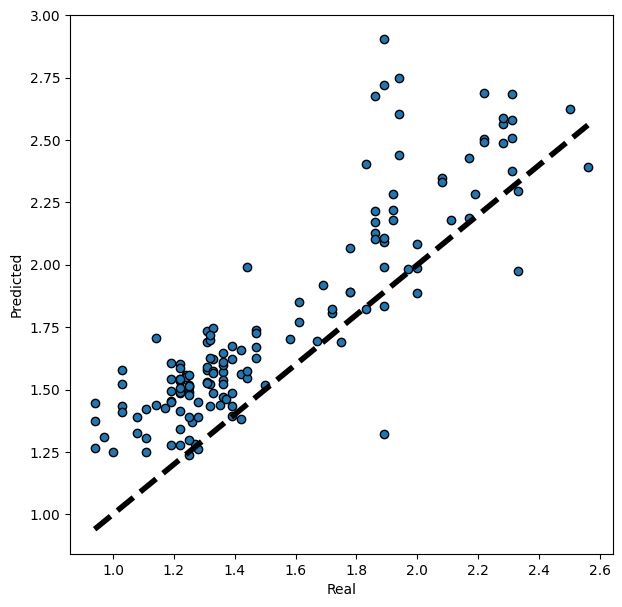

In [ ]:
fig, ax = plt.subplots( figsize=[7,7])
ax.scatter(y_valid, y_predicted, edgecolors=(0, 0, 0))
ax.plot([y_valid.min(), y_valid.max()], [y_valid.min(), y_valid.max()], 'k--', lw=4)
ax.set_xlabel('Real')
ax.set_ylabel('Predicted')
plt.show()

## Modelo Lasso con walk forward

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score


preds = []
reales = []

start = len(X) - 180
window_size = 365

print(f"\nTotal datos: {len(X)} días")
print(f"Ventana de entrenamiento: {window_size} días")
print(f"Walk-forward test: {len(X) - start} días\n")

for i in range(start, len(X)):

    train_start = max(0, i - window_size)

    X_train_wf = X.iloc[train_start:i]
    y_train_wf = Y.iloc[train_start:i]

    X_test_wf = X.iloc[i:i+1]
    y_test_wf = Y.iloc[i:i+1]

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_wf)
    X_test_scaled = scaler.transform(X_test_wf)

    model = Lasso(alpha=0.001, max_iter=5000)
    model.fit(X_train_scaled, y_train_wf)

    pred = model.predict(X_test_scaled)[0]

    preds.append(pred)
    reales.append(y_test_wf.iloc[0])

mse = mean_squared_error(reales, preds)
mae = mean_absolute_error(reales, preds)
var_exp = explained_variance_score(reales, preds)
r2 = r2_score(reales, preds)
print(f"R² Walk-Forward: {r2:.4f}")
print(f"mse: {mse:.4f}")
print(f"mae: {mae:.4f}")
print(f"var exp: {var_exp:.4f}")


Total datos: 730 días
Ventana de entrenamiento: 365 días
Walk-forward test: 180 días

R² Walk-Forward: 0.8117
mse: 0.0253
mae: 0.1164
var exp: 0.8138


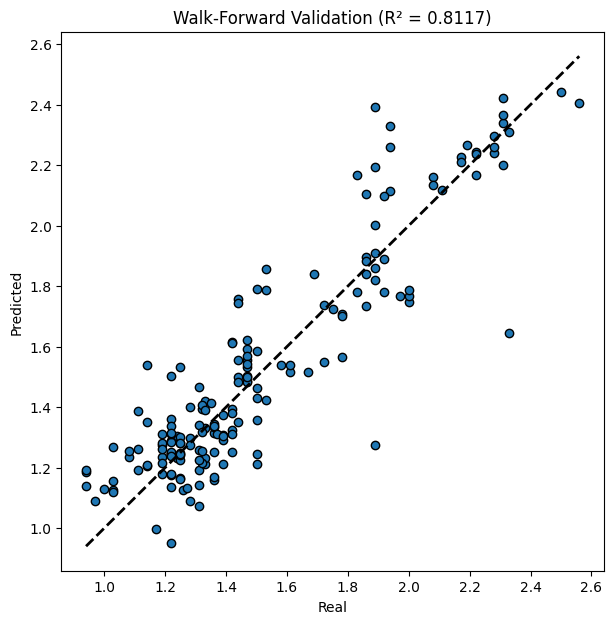

In [ ]:
# Gráfico de predicciones vs reales Walk-Forward
fig, ax = plt.subplots(figsize=[7,7])
ax.scatter(reales, preds, edgecolors=(0, 0, 0))
ax.plot([min(reales), max(reales)], [min(reales), max(reales)], 'k--', lw=2)
ax.set_xlabel('Real')
ax.set_ylabel('Predicted')
ax.set_title(f'Walk-Forward Validation (R² = {r2:.4f})')
plt.show()

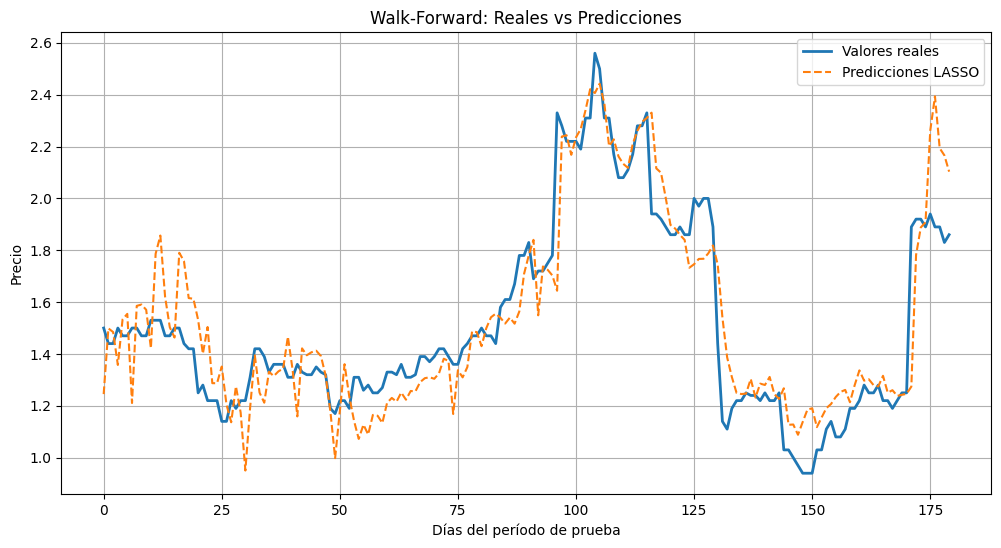

In [ ]:
plt.figure(figsize=(12, 6))

plt.plot(reales, label='Valores reales', linewidth=2)
plt.plot(preds, label='Predicciones LASSO', linestyle='--')

plt.title('Walk-Forward: Reales vs Predicciones')
plt.xlabel('Días del período de prueba')
plt.ylabel('Precio')
plt.legend()
plt.grid(True)
plt.show()

## Random Forest con Walk Forward

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
df2 = df.dropna().copy()

In [ ]:
X = df2[['Año', 'Día', 'Temp Max', 'Temp Min', 'Humedad',
        'Precipitaciones', 'Masa ingreso Bolsa(T)', 'Incendio Forestal',
        'Lluvias Intensas', 'Inundacion', 'Huaico', 'Fenomeno_Niño',
        'Estación_invierno', 'Estación_otoño', 'Estación_primavera',
        'Estación_verano', 'Trimestre_1', 'Trimestre_2', 'Trimestre_3',
        'Trimestre_4', 'mes_sin', 'mes_cos',
        'Temp_Min_lag10', 'Temp_Max_lag10', 'Humedad_lag10',
        'Precipitaciones_lag10',
        'Precio_lag1', 'Precio_lag3', 'Precio_lag7',
        'Precio_lag14', 'Precio_lag21', 'Precio_lag30',
        'Precio_roll7', 'Precio_roll14', 'Precio_roll30',
        'Precio_vol7', 'Precio_vol30']]

Y = df2['Precios Bolsa']

In [ ]:
preds = []
reales = []

# Últimos 180 días para walk forward
start = len(X) - 180

# Tamaño de ventana de entrenamiento 365 días
window_size = 365

print(f"Total datos: {len(X)} días")
print(f"Ventana de entrenamiento: {window_size} días")
print(f"Walk-forward test: últimos {len(X) - start} días")

for i in range(start, len(X)):

    train_start = max(0, i - window_size)
    X_train = X.iloc[train_start:i]
    y_train = Y.iloc[train_start:i]

    X_test = X.iloc[i:i+1]
    y_test = Y.iloc[i:i+1]

    model = RandomForestRegressor(
      n_estimators=400,
      max_depth=20,
      random_state=42,
      max_features=None,
      min_samples_leaf=2,
      min_samples_split=3
    )

    model.fit(X_train, y_train)

    pred = model.predict(X_test)[0]

    preds.append(pred)
    reales.append(y_test.iloc[0])

Total datos: 730 días
Ventana de entrenamiento: 365 días
Walk-forward test: últimos 180 días


In [ ]:

mse = mean_squared_error(reales, preds)
mae = mean_absolute_error(reales, preds)
var_exp = explained_variance_score(reales, preds)
r2 = r2_score(reales, preds)
print(f"R² Walk-Forward: {r2:.4f}")
print(f"mse: {mse:.4f}")
print(f"mae: {mae:.4f}")
print(f"var exp: {var_exp:.4f}")

R² Walk-Forward: 0.8723
mse: 0.0171
mae: 0.0849
var exp: 0.8724


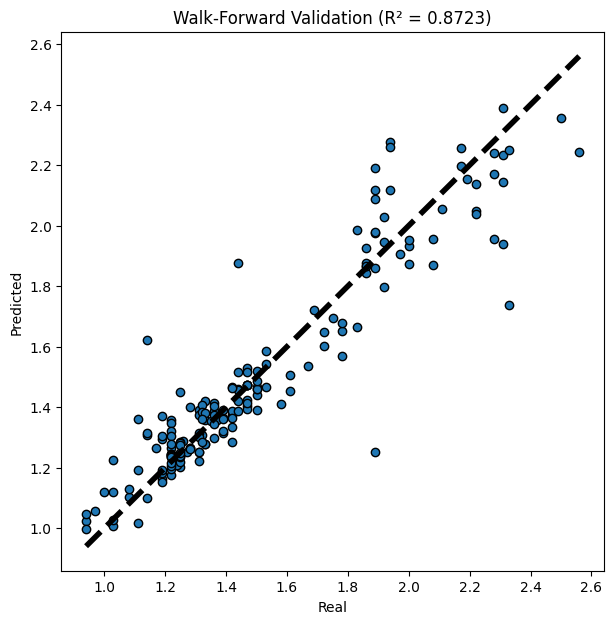

In [ ]:
# Gráfico de predicciones vs reales (Walk-Forward)
fig, ax = plt.subplots(figsize=[7,7])
ax.scatter(reales, preds, edgecolors=(0, 0, 0))
ax.plot([min(reales), max(reales)], [min(reales), max(reales)], 'k--', lw=4)
ax.set_xlabel('Real')
ax.set_ylabel('Predicted')
ax.set_title(f'Walk-Forward Validation (R² = {r2:.4f})')
plt.show()

In [ ]:
fechas_test = df2.index[start : start + len(preds)]

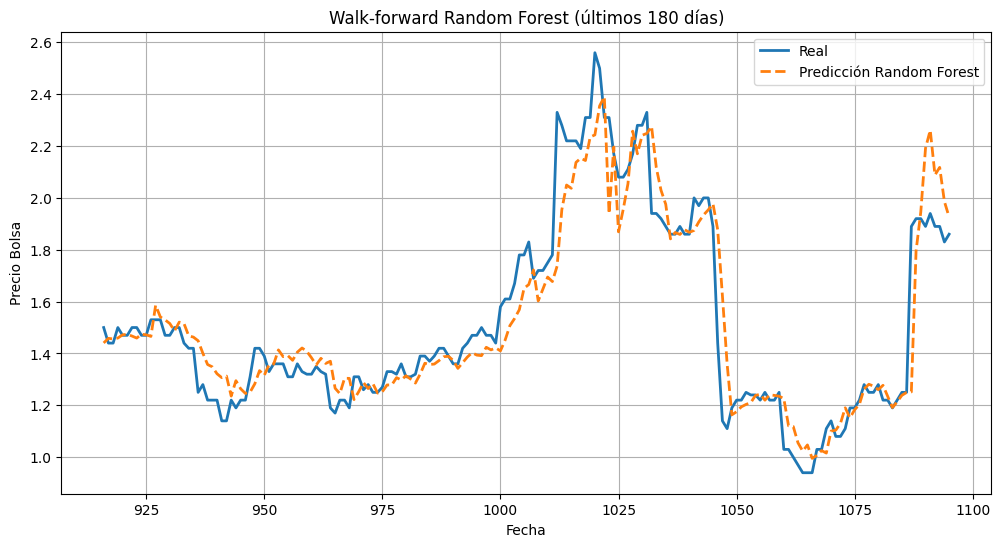

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(fechas_test, reales, label='Real', linewidth=2)
plt.plot(fechas_test, preds, label='Predicción Random Forest', linestyle='--', linewidth=2)

plt.title("Walk-forward Random Forest (últimos 180 días)")
plt.xlabel("Fecha")
plt.ylabel("Precio Bolsa")
plt.legend()
plt.grid(True)
plt.show()

# Predicción base line (uso de media de semana anterior histórico)

In [ ]:
df2 = df
df2["media_14"] = df2['Precios Bolsa'].rolling(window=14).mean().shift(1)

df2 = df2.dropna().reset_index(drop=True)

X = df2[["media_14"]]
y = df2['Precios Bolsa']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=vadid_fraction, random_state=seed,shuffle=False)

y_predicted = X_valid["media_14"]

print("Mean squared error:", mean_squared_error(y_valid, y_predicted))
print("Mean absolute error:", mean_absolute_error(y_valid, y_predicted))
print("Explained variance score:", explained_variance_score(y_valid, y_predicted))
print("R2 score:", r2_score(y_valid, y_predicted))

Mean squared error: 0.05905500992063492
Mean absolute error: 0.17290674603174605
Explained variance score: 0.6324287915479168
R2 score: 0.628250327373099


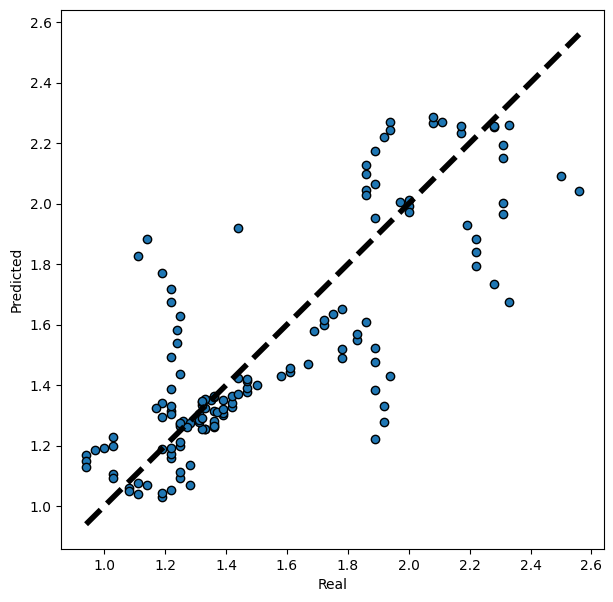

In [ ]:
fig, ax = plt.subplots( figsize=[7,7])
ax.scatter(y_valid, y_predicted, edgecolors=(0, 0, 0))
ax.plot([y_valid.min(), y_valid.max()], [y_valid.min(), y_valid.max()], 'k--', lw=4)
ax.set_xlabel('Real')
ax.set_ylabel('Predicted')
plt.show()

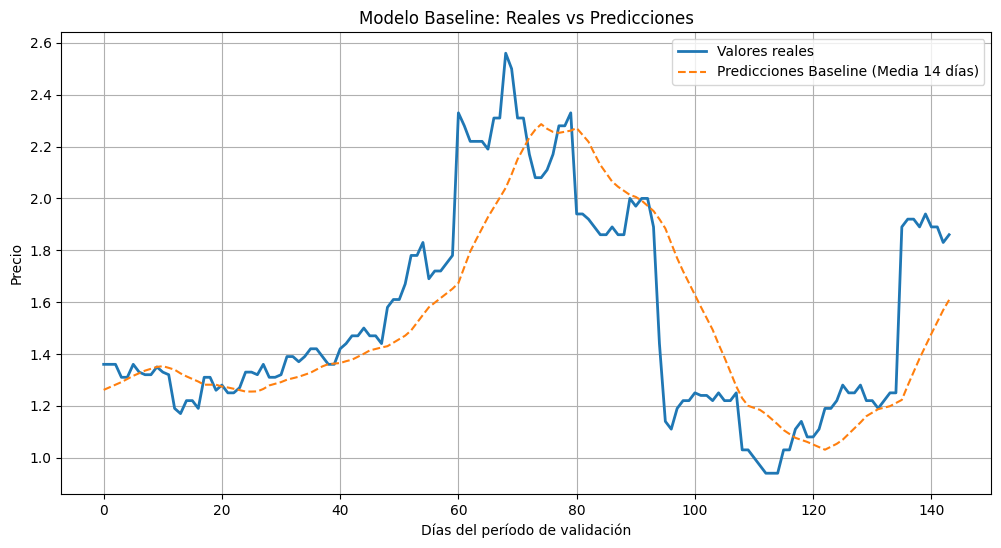

In [ ]:
plt.figure(figsize=(12, 6))

plt.plot(y_valid.values, label='Valores reales', linewidth=2)
plt.plot(y_predicted.values, label='Predicciones Baseline (Media 14 días)', linestyle='--')

plt.title('Modelo Baseline: Reales vs Predicciones')
plt.xlabel('Días del período de validación')
plt.ylabel('Precio')
plt.legend()
plt.grid(True)
plt.show()